In [1]:
import pandapower as pp #import pandapower



http://localhost:8888/notebooks/PandapowerExampleMod_vr1.0.ipynb#
net = pp.create_empty_network() #create an empty network


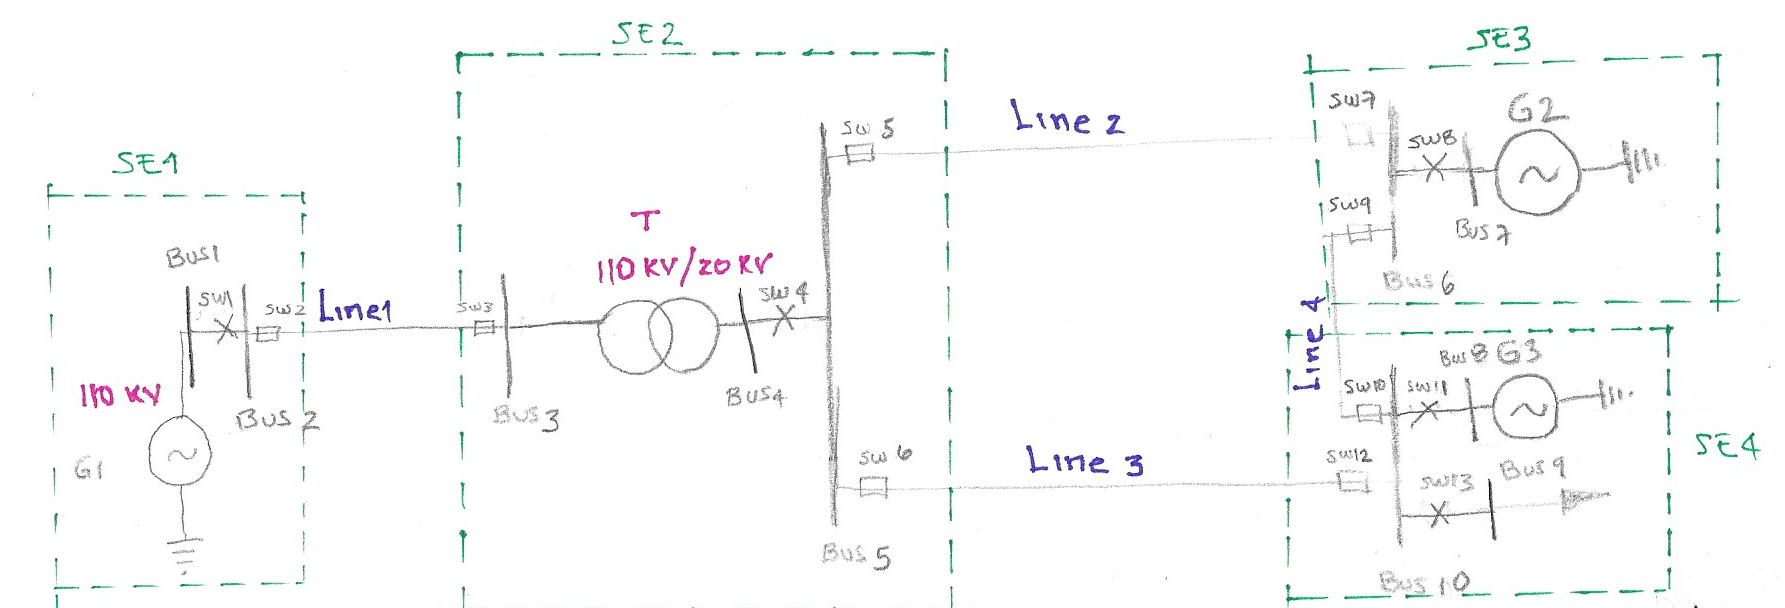

In [2]:
# Buses
bus1 = pp.create_bus(net, name="Bus 1", vn_kv=110, type="n")
bus2 = pp.create_bus(net, name="Bus 2", vn_kv=110, type="b")
bus3 = pp.create_bus(net, name="Bus 3", vn_kv=110, type="b")
bus4 = pp.create_bus(net, name="Bus 4", vn_kv=20, type="b")
bus5 = pp.create_bus(net, name="Bus 5", vn_kv=20, type="b")
bus6 = pp.create_bus(net, name="Bus 6", vn_kv=20, type="b")
bus7 = pp.create_bus(net, name="Bus 7", vn_kv=20, type="n")
bus8 = pp.create_bus(net, name="Bus 8", vn_kv=20, type="n")
bus9 = pp.create_bus(net, name="Bus 9", vn_kv=20, type="n")
bus10 = pp.create_bus(net, name="Bus 10", vn_kv=20, type="b")


In [3]:
net.bus

,name,vn_kv,type,zone,in_service
0,Bus 1,110.0,n,None,True
1,Bus 2,110.0,b,None,True
2,Bus 3,110.0,b,None,True
3,Bus 4,20.0,b,None,True
4,Bus 5,20.0,b,None,True
5,Bus 6,20.0,b,None,True
6,Bus 7,20.0,n,None,True
7,Bus 8,20.0,n,None,True
8,Bus 9,20.0,n,None,True
9,Bus 10,20.0,b,None,True


In [4]:
# External Grid
# pp.create_ext_grid(net, bus1, vm_pu=1.02, va_degree=50) # Create an external grid connection
# pp.create_gen(net, bus1, p_mw=6, max_q_mvar=3, min_q_mvar=-3, vm_pu=1.02, name="generator1", slack=True) 

In [5]:
# Transformer
trafo1 = pp.create_transformer(net, bus3, bus4, name="110kV/20kV transformer", std_type="25 MVA 110/20 kV")

In [6]:
# Lines
line1 = pp.create_line(net, bus2, bus3, length_km=10, std_type="N2XS(FL)2Y 1x300 RM/35 64/110 kV",  name="Line 1")
line2 = pp.create_line(net, bus5, bus6, length_km=2.0, std_type="NA2XS2Y 1x240 RM/25 12/20 kV", name="Line 2")
line3 = pp.create_line(net, bus5, bus10, length_km=3.5, std_type="48-AL1/8-ST1A 20.0", name="Line 3")
line4 = pp.create_line(net, bus10, bus6, length_km=2.5, std_type="NA2XS2Y 1x240 RM/25 12/20 kV", name="Line 4")


In [7]:
net.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service
0,Line 1,N2XS(FL)2Y 1x300 RM/35 64/110 kV,1,2,10.0,0.0600,0.144,144.0,0.0,0.588,1.0,1,cs,True
1,Line 2,NA2XS2Y 1x240 RM/25 12/20 kV,4,5,2.0,0.1220,0.112,304.0,0.0,0.421,1.0,1,cs,True
2,Line 3,48-AL1/8-ST1A 20.0,4,9,3.5,0.5939,0.372,9.5,0.0,0.210,1.0,1,ol,True
3,Line 4,NA2XS2Y 1x240 RM/25 12/20 kV,9,5,2.5,0.1220,0.112,304.0,0.0,0.421,1.0,1,cs,True


In [8]:
# Voltage controlled Generator
pp.create_gen(net, bus1, p_mw=6, max_q_mvar=3, min_q_mvar=-3, vm_pu=1.03, name="G1",slack=True)
pp.create_gen(net, bus7, p_mw=6, max_q_mvar=3, min_q_mvar=-3, vm_pu=1.03, name="G2")  
pp.create_gen(net, bus8, p_mw=6, max_q_mvar=3, min_q_mvar=-3, vm_pu=1.03, name="G3") 

2

In [9]:
net.gen

,name,bus,p_mw,vm_pu,sn_mva,min_q_mvar,max_q_mvar,scaling,slack,in_service,type
0,G1,0,6.0,1.03,NaN,-3.0,3.0,1.0,True,True,None
1,G2,6,6.0,1.03,NaN,-3.0,3.0,1.0,False,True,None
2,G3,7,6.0,1.03,NaN,-3.0,3.0,1.0,False,True,None


In [10]:
# Switches
sw1 = pp.create_switch(net, bus1, bus2, et="b", type="CB", closed=True)
sw2 = pp.create_switch(net, bus2, line1, et="l", type="LBS", closed=True)
sw3 = pp.create_switch(net, bus3, line1,et="l", type="LBS", closed=True)
sw4 = pp.create_switch(net, bus4, bus5, et="b", type="CB", closed=True)
sw5 = pp.create_switch(net, bus5, line2, et="l", type="LBS", closed=True)
sw6 = pp.create_switch(net, bus5, line3, et="l", type="LBS", closed=True)
sw7 = pp.create_switch(net, bus6, line2, et="l", type="LBS", closed=True)
sw8 = pp.create_switch(net, bus6, bus7, et="b", type="CB", closed=True)
sw9 = pp.create_switch(net, bus6, line4, et="l", type="LBS", closed=True)
sw10 = pp.create_switch(net,bus10, line4, et="l", type="LBS", closed=True)
sw11 = pp.create_switch(net, bus10, bus8, et="b", type="CB", closed=True)
sw12 = pp.create_switch(net, bus10, line3, et="l", type="LBS", closed=True)
sw13 = pp.create_switch(net, bus10, bus9, et="b", type="CB", closed=True)

In [11]:
# Load
pp.create_load(net, bus9, p_mw=2, q_mvar=4, scaling=0.6, name="load")

0

In [12]:
# Static Generator
# pp.create_sgen(net, bus7, p_mw=2, q_mvar=-0.5, name="static generator")


In [13]:
# Shunt
# pp.create_shunt(net, bus3, q_mvar=-0.96, p_mw=0, name='Shunt')

In [14]:
# Power Flow
pp.runpp(net)

In [15]:
# RESULTS

In [16]:
# Buses
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.030000,0.000000,10.680309,3.911803
1,1.030000,0.000000,0.000000,0.000000
2,1.030631,0.065905,0.000000,0.000000
3,1.024803,2.866511,0.000000,0.000000
4,1.024803,2.866511,0.000000,0.000000
5,1.030000,3.157745,0.000000,0.000000
6,1.030000,3.157745,-6.000000,-2.972426
7,1.030000,3.419281,-6.000000,2.031835
8,1.030000,3.419281,1.200000,2.400000
9,1.030000,3.419281,0.000000,0.000000


In [17]:
# External grid
net.res_ext_grid

,p_mw,q_mvar


In [18]:
# Line
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,-10.680309,-3.911803,10.685688,-1.886120,0.005379,-5.797923,0.057960,0.055260,0.057960,1.030000,0.000000,1.030631,0.065905,9.857140
1,-9.107770,0.394237,9.156060,-0.430554,0.048290,-0.036316,0.256796,0.256898,0.256898,1.024803,2.866511,1.030000,3.157745,61.020859
2,-1.610897,0.948409,1.628208,-0.941976,0.017312,0.006433,0.052657,0.052720,0.052720,1.024803,2.866511,1.030000,3.419281,25.104710
3,3.171792,-3.489858,-3.156060,3.402980,0.015732,-0.086878,0.132170,0.130078,0.132170,1.030000,3.419281,1.030000,3.157745,31.394338


In [19]:
# Trafos
net.res_trafo

,p_hv_mw,q_hv_mvar,p_lv_mw,q_lv_mvar,pl_mw,ql_mvar,i_hv_ka,i_lv_ka,vm_hv_pu,va_hv_degree,vm_lv_pu,va_lv_degree,loading_percent
0,-10.685688,1.88612,10.718666,-1.342647,0.032978,0.543474,0.05526,0.304292,1.030631,0.065905,1.024803,2.866511,42.16394


In [20]:
# Load
net.res_load

,p_mw,q_mvar
0,1.2,2.4


In [21]:
# Static Generator
net.res_sgen

,p_mw,q_mvar


In [22]:
#Generator
net.res_gen

,p_mw,q_mvar,va_degree,vm_pu
0,-10.680309,-3.911803,0.000000,1.03
1,6.000000,2.972426,3.157745,1.03
2,6.000000,-2.031835,3.419281,1.03


In [23]:
# Shunt
net.res_shunt


,p_mw,q_mvar,vm_pu


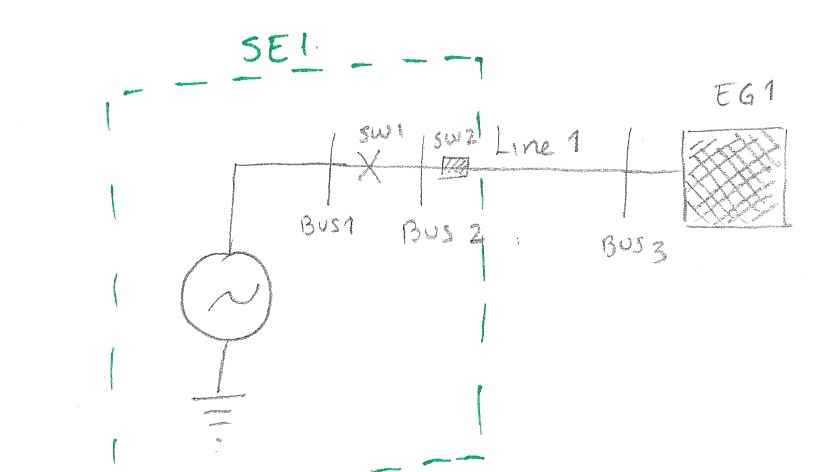

In [28]:
#SE1
net2 = pp.create_empty_network()

#Buses
bus1_se = pp.create_bus(net2, name="Bus 1", vn_kv=110, type="n")
bus2_se = pp.create_bus(net2, name="Bus 2", vn_kv=110, type="b")
bus3_se = pp.create_bus(net2, name="Bus 3", vn_kv=110, type="b")

# Generator
pp.create_gen(net2, bus1_se, p_mw=6, max_q_mvar=3, min_q_mvar=-3, vm_pu=1.03, name="G1",slack=True)

#Line
line1_se = pp.create_line(net2, bus2_se, bus3_se, length_km=10, std_type="N2XS(FL)2Y 1x300 RM/35 64/110 kV",  name="Line 1_se")

# Switches
sw1_se = pp.create_switch(net2, bus1, bus2, et="b", type="CB", closed=True)
sw2_se = pp.create_switch(net2, bus2, line1, et="l", type="LBS", closed=True)

# External Grid
pp.create_ext_grid(net2, bus3_se, vm_pu=1.0, va_degree=0, name ='EG1')

# Power Flow
pp.runpp(net2)



In [30]:
net2.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.03,0.0,-92.181953,-218.333050
1,1.03,0.0,0.000000,0.000000
2,1.00,0.0,89.497041,217.529855


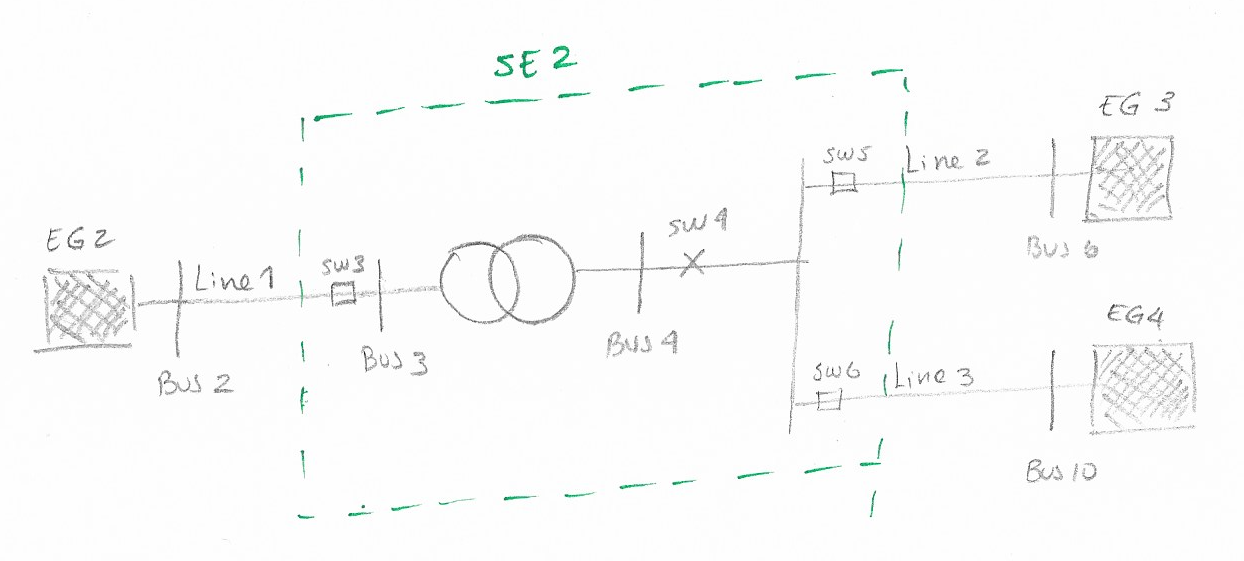

In [32]:
#SE2
net3 = pp.create_empty_network()

#Buses
bus2 = pp.create_bus(net3, name="Bus 2", vn_kv=110, type="b")
bus3 = pp.create_bus(net3, name="Bus 3", vn_kv=110, type="n")
bus4 = pp.create_bus(net3, name="Bus 4", vn_kv=20, type="b")
bus5 = pp.create_bus(net3, name="Bus 5", vn_kv=20, type="b")
bus6 = pp.create_bus(net3, name="Bus 6", vn_kv=20, type="b")
bus10 = pp.create_bus(net3, name="Bus 10", vn_kv=20, type="b")

# External Grid
pp.create_ext_grid(net3, bus3, vm_pu=1.0, va_degree=0, name = 'EG2', slack = True)
pp.create_ext_grid(net3, bus6, vm_pu=1.0, va_degree=0, name = 'EG3')
pp.create_ext_grid(net3, bus10, vm_pu=1.0, va_degree=0, name = 'EG4')

#Line
line1 = pp.create_line(net3, bus2, bus3, length_km=10, std_type="N2XS(FL)2Y 1x300 RM/35 64/110 kV",  name="Line 1")
line2 = pp.create_line(net3, bus5, bus6, length_km=2.0, std_type="NA2XS2Y 1x240 RM/25 12/20 kV", name="Line 2")
line3 = pp.create_line(net3, bus5, bus10, length_km=3.5, std_type="48-AL1/8-ST1A 20.0", name="Line 3")

# Switches
sw3 = pp.create_switch(net3, bus3, line1,et="l", type="LBS", closed=True)
sw4 = pp.create_switch(net3, bus4, bus5, et="b", type="CB", closed=True)
sw5 = pp.create_switch(net3, bus5, line2, et="l", type="LBS", closed=True)
sw6 = pp.create_switch(net3, bus5, line3, et="l", type="LBS", closed=True)

# Power Flow
pp.runpp(net3)
net3.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.000326,-0.007779,0.000000,0.000000
1,1.000000,0.000000,-0.000372,5.474803
2,1.000019,-0.001267,0.000000,0.000000
3,1.000019,-0.001267,0.000000,0.000000
4,1.000000,0.000000,-0.000773,0.073754
5,1.000000,0.000000,0.000772,0.006829


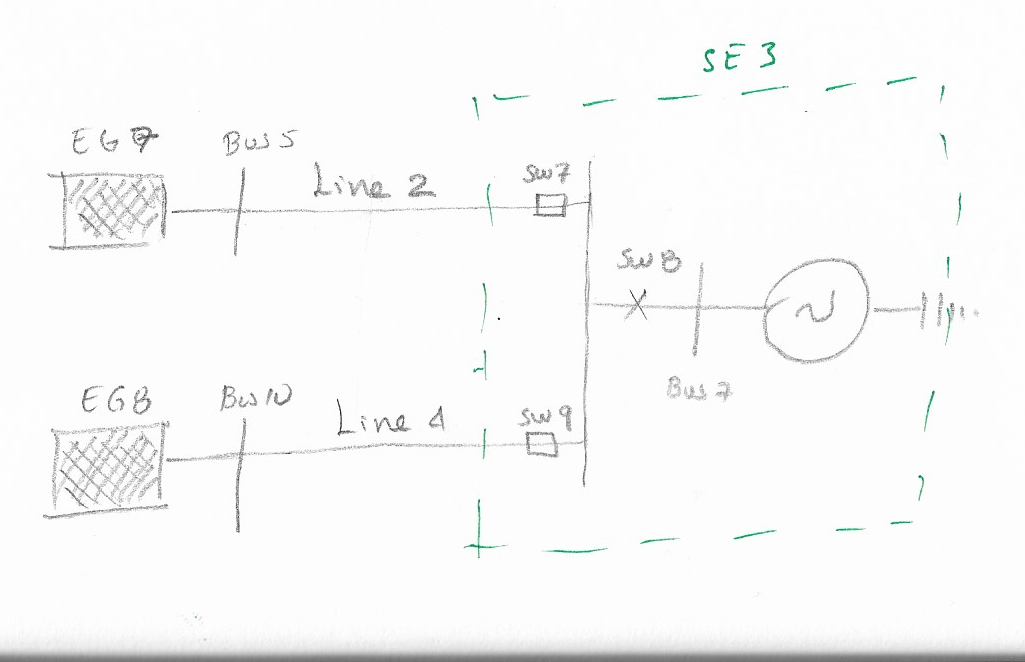

In [33]:
#SE3
net4 = pp.create_empty_network()

#Buses
bus5 = pp.create_bus(net4, name="Bus 5", vn_kv=20, type="b")
bus6 = pp.create_bus(net4, name="Bus 6", vn_kv=20, type="b")
bus8 = pp.create_bus(net4, name="Bus 8", vn_kv=20, type="n")
bus9 = pp.create_bus(net4, name="Bus 9", vn_kv=20, type="n")
bus10 = pp.create_bus(net4, name="Bus 10", vn_kv=20, type="b")

#Lines
line3 = pp.create_line(net4, bus5, bus10, length_km=3.5, std_type="48-AL1/8-ST1A 20.0", name="Line 3")
line4 = pp.create_line(net4, bus6, bus10, length_km=2.5, std_type="NA2XS2Y 1x240 RM/25 12/20 kV", name="Line 4")


# Switches
sw10 = pp.create_switch(net4,bus10, line4, et="l", type="LBS", closed=True)
sw11 = pp.create_switch(net4, bus10, bus8, et="b", type="CB", closed=True)
sw12 = pp.create_switch(net4, bus10, line3, et="l", type="LBS", closed=True)
sw13 = pp.create_switch(net4, bus10, bus9, et="b", type="CB", closed=True)

# Generator
pp.create_gen(net4, bus8, p_mw=6, max_q_mvar=3, min_q_mvar=-3, vm_pu=1.03, name="G3",slack=True)

# Load
pp.create_load(net4, bus9, p_mw=2, q_mvar=4, scaling=0.6, name="load")

# External Grid
pp.create_ext_grid(net4, bus6, vm_pu=1.0, va_degree=0, name = 'SE3')
pp.create_ext_grid(net4, bus5, vm_pu=1.0, va_degree=0, name = 'SE4')

# Power Flow
pp.runpp(net4)
net4.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.00,0.0,4.146250,2.599168
1,1.00,0.0,21.350445,19.648161
2,1.03,0.0,-27.461596,-25.210535
3,1.03,0.0,1.200000,2.400000
4,1.03,0.0,0.000000,0.000000


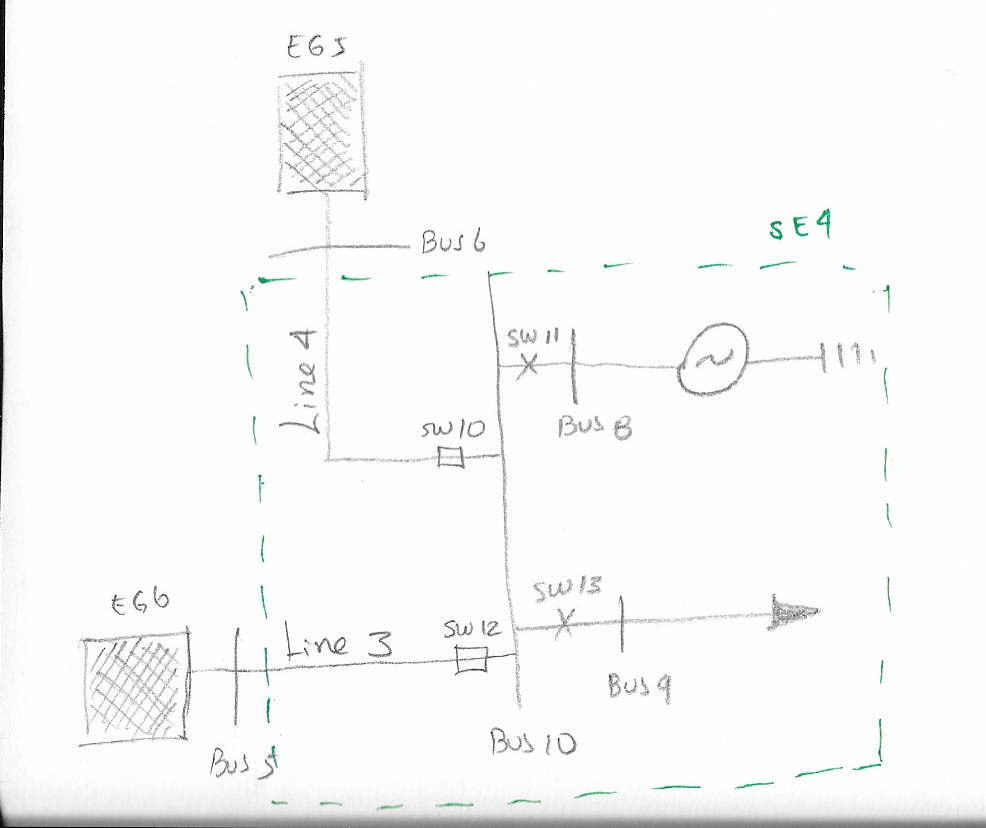

In [36]:
#SE4
net5 = pp.create_empty_network()

#Buses
bus5 = pp.create_bus(net5, name="Bus 5", vn_kv=20, type="b")
bus6 = pp.create_bus(net5, name="Bus 6", vn_kv=20, type="b")
bus7 = pp.create_bus(net5, name="Bus 7", vn_kv=20, type="b")
bus10 = pp.create_bus(net5, name="Bus 10", vn_kv=20, type="b")

#Lines
line2 = pp.create_line(net5, bus5, bus6, length_km=2.0, std_type="NA2XS2Y 1x240 RM/25 12/20 kV", name="Line 2")
line4 = pp.create_line(net5, bus6, bus10, length_km=2.5, std_type="NA2XS2Y 1x240 RM/25 12/20 kV", name="Line 4")

# Switches
sw7 = pp.create_switch(net5, bus6, line2, et="l", type="LBS", closed=True)
sw8 = pp.create_switch(net5, bus6, bus7, et="b", type="CB", closed=True)
sw9 = pp.create_switch(net5, bus6, line4, et="l", type="LBS", closed=True)

# Generator
pp.create_gen(net5, bus7, p_mw=6, max_q_mvar=3, min_q_mvar=-3, vm_pu=1.03, name="G2",slack=True)

# External Grid
pp.create_ext_grid(net5, bus5, vm_pu=1.0, va_degree=0, name = 'EG7')
pp.create_ext_grid(net5, bus10, vm_pu=1.0, va_degree=0, name = 'EG8')

# Power Flow
pp.runpp(net5)
net5.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.00,0.0,26.688056,24.538712
1,1.03,0.0,0.000000,0.000000
2,1.03,0.0,-49.479656,-45.332758
3,1.00,0.0,21.350445,19.648161
